<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/03_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>K-Means Clustering</h1> 
</strong>

---


In [ ]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 468, done.
remote: Counting objects: 100% (468/468), done.
remote: Compressing objects: 100% (410/410), done.
remote: Total 2654 (delta 176), reused 298 (delta 52), pack-reused 2186
Receiving objects: 100% (2654/2654), 333.54 MiB | 21.57 MiB/s, done.
Resolving deltas: 100% (954/954), done.
Checking out files: 100% (1090/1090), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#plt.style.use('ggplot')
sns.set_theme()
%matplotlib inline

In [ ]:
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/30_Cluster-Analysis-in-Python/_dataSet')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Data-Scientist-with-Python/30_Cluster-Analysis-in-Python/_dataSet


In [ ]:
ls

comic_con.csv        fifa_18_sample_data.csv  movies_plot.csv  uniform_data.csv
fifa_18_dataset.csv  mouse.csv                pokemon.csv


## Basics of k-means clustering

- **Why k-means clustering?**
    - A critical drawback of hierarchical clustering: **runtime**
    - K means runs significantly fater, and it allows us to cluster large datasets in a fraction of the time.

### **Step - 1: Generate cluster centers**

```
kmeans(obs, k_or_guess, iter, thresh, check_finite)
```
- __`obs`__ : list of observations, which have been standardized through the whiten method. 
- __`k_or_guess`__ : number of clusters
- __`iter`__ : the number of iterations of the algorithm to perform(default: 20)
- __`thres`__ : threshold (default: 1e-05)
- __`check_finite`__ : The last argument is a boolean value indicating if a check needs to be performed on the data for the presence of infinite or NaN values. The default value is True, which ensures that data points with NaN or infinite values are not considered for classification, which ensures that the results are accurate and unbiased.

The k-means function returns two arguments,
- __cluster centers__
-  __distortion__

>k-means runs really quickly as compared to hierarchical clustering as the number of operations is considerably less in k-means clustering.

### **Step - 2: Generate cluster labels**

It takes three arguments.
```
vq(obs, code_book, check_finite=True)
```

- __`obs`__ : The first argument is the list of observations, which have been standardized through the whiten method.
- __`code_book`__ : `cluster_centers` - The second argument is the code book, that is the first output of the kmeans method.
- __`check_finite`__ : The third optional argument is `check_finite`, a __Boolean value__ indicating if a check needs to be performed on the data for the presence of infinite or `NaN` values. __By default=True__. The function returns the cluster labels, also known as the "code book index" and the distortion.

### __A note on distortions__
- `kmeans` returns a **single** value of distortions
- `vq` returns a **list** of distortions.

__NOTE:__ The`mean` of the list of distortions from the `vq` method should __approximately equal__ the distortion value of the `kmeans` method if the same list of observations is passed.

### K-means clustering: first exercise
This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.

Recall the two steps of k-means clustering:

- Define cluster centers through ```kmeans()``` function. It has two required arguments: observations and number of clusters.
- Assign cluster labels through the ```vq()``` function. It has two required arguments: observations and cluster centers.

- Preprocess

In [ ]:
comic_con = pd.read_csv('comic_con.csv', index_col=0)
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled,cluster_labels
0,17.0,4.0,0.509349,0.090010,2
1,20.0,6.0,0.599234,0.135015,2
2,35.0,0.0,1.048660,0.000000,2
3,14.0,0.0,0.419464,0.000000,2
4,37.0,4.0,1.108583,0.090010,2


In [ ]:
from scipy.cluster.vq import whiten

comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

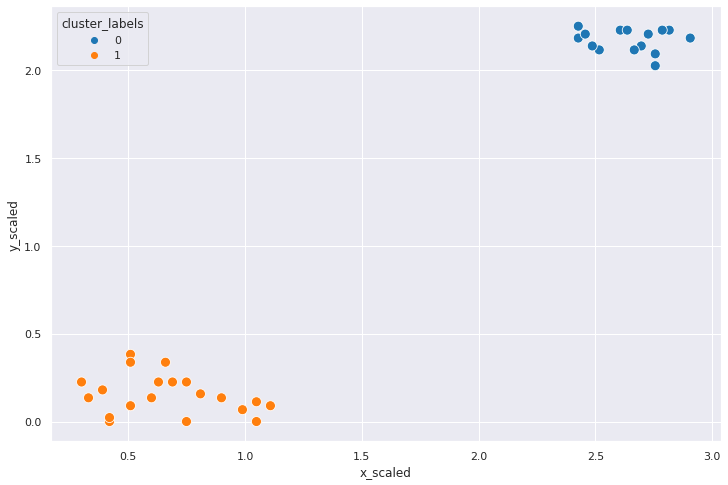

In [ ]:
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortions = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot Size
plt.figure(figsize=(12,8))

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels',
                palette='tab10',
                s=100,
                data=comic_con)
plt.show()

### Runtime of k-means clustering
Recall that it took a significantly long time to run hierarchical clustering. How long does it take to run the kmeans() function on the FIFA dataset?

- Preprocess

In [ ]:
fifa = pd.read_csv('fifa_18_dataset.csv')
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [ ]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

In [ ]:
from scipy.cluster.hierarchy import linkage

%timeit linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method='ward')

1 loop, best of 5: 10.3 s per loop


In [ ]:
%timeit kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 2)

10 loops, best of 5: 126 ms per loop


## How many clusters?

- **How to find the right k?**
    - **No absolute method** to find right number of clusters(k) in k-means clustering
    - **Elbow method**(*indicative methods*): To decide the right number of clusters for our dataset.

    
- **Distortion**

    - The distortion is the*** sum of the squares of distances between each data point and its cluster center***. 
    - Ideally, distortion has an **inverse relationship** with the number of **clusters** 
    - Distortion **decreases** with increasing number of clusters. This trend is intuitive - as segmenting the data into smaller fragments will lead to clusters being closer together, leading to a lower distortion This is the underlying logic of the **Elbow Method** which is a line plot between the ***number of clusters*** and ***their corresponding distortions***.

- **Elbow method**
![elbow](https://miro.medium.com/max/832/1*8wV1j-klQA1xFvfaNXuVzg.png)

    - Elbow plot helps indicate number of clusters present in data
    - Only gives an indication of __optimal k__ Occasionally, it may be insufficient to find an optimal __k__. The elbow method fails when data is __Evenly distributed__.
    - Other Cluster indicative methods are:
        - __Average Silhouette__
        - __Gap Statistic__

### Elbow method on distinct clusters
Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

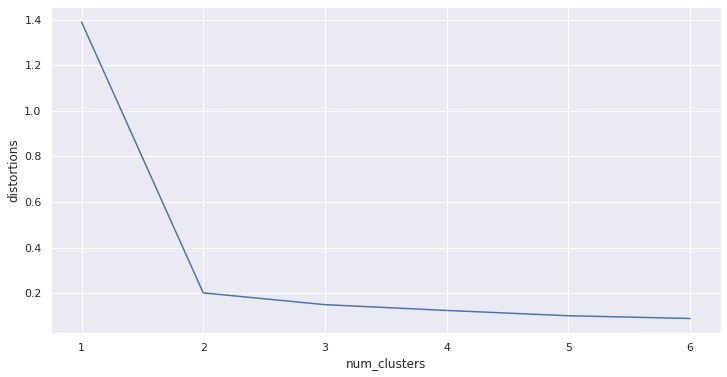

In [ ]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)
    
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Plot Size
plt.figure(figsize=(12,6))

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

**From the elbow plot, how many clusters are there in the data?**

- 2 Clusters


### Elbow method on uniform data
In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a data set with uniformly distributed points. You may want to display the data points on the console before proceeding with the exercise.

In [ ]:
uniform_data = pd.read_csv('uniform_data.csv', index_col=0)
uniform_data.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,39.0,3.0,2.376199,1.152237
1,42.0,7.0,2.558984,2.688554
2,58.0,3.0,3.533835,1.152237
3,43.0,3.0,2.619912,1.152237
4,13.0,6.0,0.792066,2.304475


In [ ]:
uniform_data['x_scaled'] = whiten(uniform_data['x_coordinate'])
uniform_data['y_scaled'] = whiten(uniform_data['y_coordinate'])

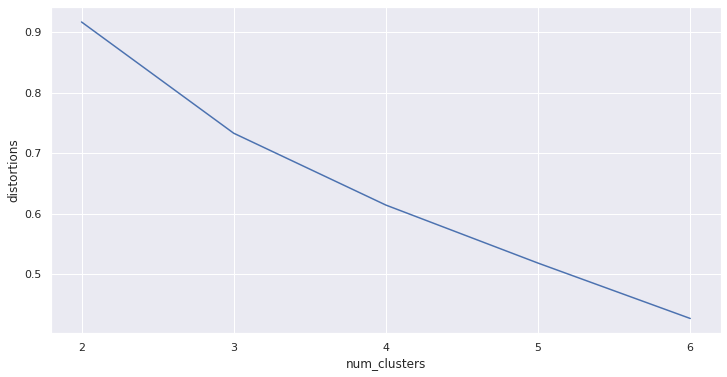

In [ ]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)
    
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Plot Size
plt.figure(figsize=(12,6))

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

From the elbow plot, how many clusters are there in the data?

- There is no well defined elbow in this plot hence - ***Can not be determined***

## Limitations of k-means clustering

- **How to find the right K:** The first issue is the procedure to find the*** right number of clusters***, __k__. the ***elbow method*** is one of the ways to determine the right k, but may **not always work**.

- **Impact of seeds**- As the process of defining the initial cluster centers is **random**, this **initialization** can affect the final clusters. Therefore, to get consistent results when running `k-means` clustering on the same dataset multiple times, ***it is a good idea to set the initialization parameters for random number generation***. The seed is initialized through the **seed method** of random class in numpy. we can pass a single integer or a 1D array as an argument.

```python
# Initialize a random seed
from numpy import random
random.seed(12)
```
![impact_seed](https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/30_Cluster-Analysis-in-Python/_img/seeds.png?raw=true)

You will notice that many points along the cluster boundaries have interchanged clusters. Interestingly, the effect of seeds is only seen when the data to be clustered is fairly uniform. If the data has distinct clusters before clustering is performed, the effect of seeds will not result in any changes in the formation of resulting clusters.

- **Biased towards equal sized clusters**

### Impact of seeds on distinct clusters
You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.



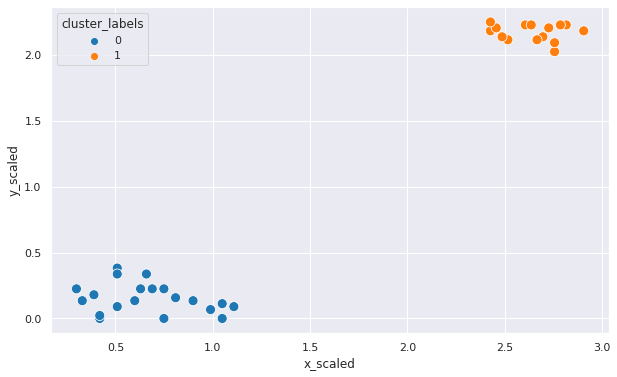

In [ ]:
from scipy.cluster.vq import kmeans, vq

# Initialize seed
np.random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot Size
plt.figure(figsize=(10,6))

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels',
                palette='tab10',
                s=100,
                data=comic_con)
plt.show()

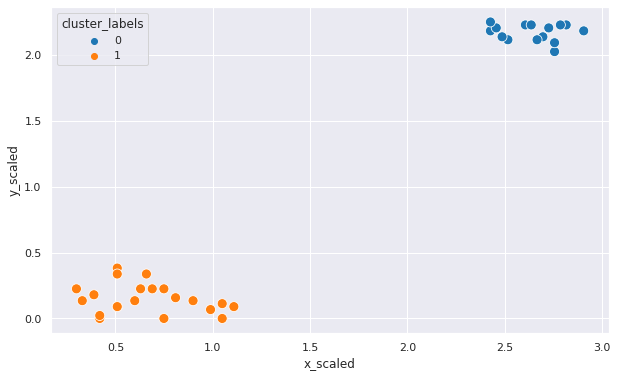

In [ ]:
# Initialize seed
np.random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot Size
plt.figure(figsize=(10,6))

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels',
                palette='tab10',
                s=100,
                data=comic_con)
plt.show()

### __Uniform clusters in k-means: a comparison__

![uni](https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/30_Cluster-Analysis-in-Python/_img/uni_cluster.png?raw=true)

- The results of **k-means clustering** get **non-intuitive clusters** even after varying the seeds. This is because ***the very idea of k-means clustering is to minimize distortions***. This results in clusters that have similar areas and not necessarily the similar number of data points.

- However, when we look at the results of **hierarchical clustering** on the same dataset using the **complete method** to decide **cluster proximity**, we will notice that the clusters formed are **intuitive** and **consistent** with our assumption in the earlier slide.

### Uniform clustering patterns
Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

- preprocess

In [ ]:
mouse = pd.read_csv('mouse.csv', index_col=0)
mouse.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,33.875528,44.893421,2.209458,2.977524
1,38.208748,41.116327,2.492083,2.727011
2,35.740588,57.418006,2.331103,3.808208
3,32.546963,57.218082,2.122806,3.794948
4,62.063146,47.196944,4.047935,3.130303


In [ ]:
mouse['x_scaled'] = whiten(mouse['x_coordinate'])
mouse['y_scaled'] = whiten(mouse['y_coordinate'])

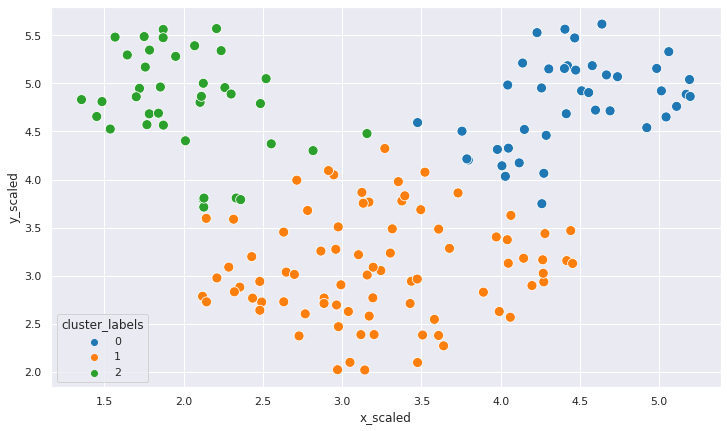

In [ ]:
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot Size
plt.figure(figsize=(12,7))

# Plot clusters
sns.scatterplot(x='x_scaled',
                y='y_scaled',
                palette='tab10',
                s=100,
                hue='cluster_labels',
                data=mouse);

Notice that kmeans is unable to capture the three visible clusters clearly, and the two clusters towards the top have taken in some points along the boundary. *This happens due to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that are similar in terms of area.*

### FIFA 18: defenders revisited
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

- defending: a number which signifies the defending attributes of a player
- physical: a number which signifies the physical attributes of a player

These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

- Preprocess

In [ ]:
fifa = pd.read_csv('fifa_18_sample_data.csv')
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,...,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,...,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,68.0,Neymar,True,https://cdn.sofifa.org/flags/54@3x.png,Brazil,https://cdn.sofifa.org/18/players/190871.png,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,High,Medium,Right,75,89,62,81,83,96,81,...,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,86.0,Normal,True,https://cdn.sofifa.org/flags/60@3x.png,Uruguay,https://cdn.sofifa.org/18/players/176580.png,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,High,Medium,Right,77,94,77,83,88,86,86,...,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,92.0,Normal,True,https://cdn.sofifa.org/flags/21@3x.png,Germany,https://cdn.sofifa.org/18/players/167495.png,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,60,91,5,1,4,Medium,Medium,Right,15,13,25,55,11,30,14,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


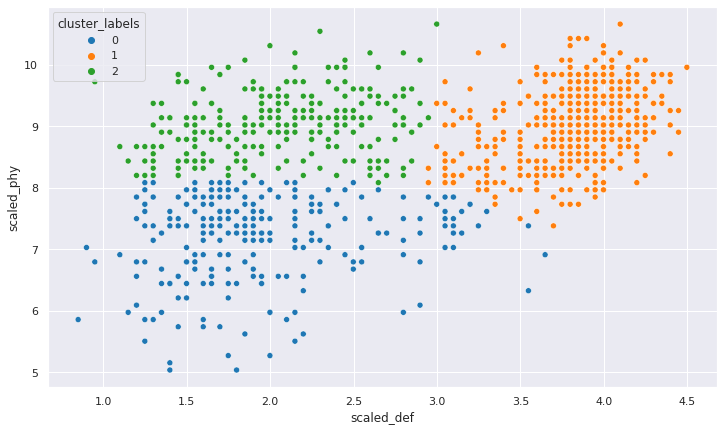

In [ ]:
from scipy.cluster.vq import kmeans, vq

fifa = fifa[['def', 'phy']].copy()

fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

# Setup a random seed in numpy
np.random.seed([1000, 2000])

# Fit the data into a k-means algorithm
cluster_centers, _ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Plot Size
plt.figure(figsize=(12,7))

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def',
                y='scaled_phy',
                hue='cluster_labels',
                palette='tab10',
                data=fifa);

> **Notice** that the seed has an impact on clustering as the data is uniformly distributed.